In [8]:
import cv2
import numpy as np

filename = 'C:/Users/MANDEEP SINGH SHERRY/Desktop/practise/chair4444.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

coord = np.where(np.all(img == (0, 0, 255), axis=-1))

a= list(zip(*(coord[0], coord[1])))

print (a)


cv2.imshow('dst',img)
cv2.waitKey(0)
cv2.imwrite('CornerSquare.jpg',img)

[(4, 207), (4, 208), (4, 209), (4, 210), (5, 207), (5, 208), (5, 209), (5, 210), (6, 207), (6, 208), (6, 209), (6, 210), (7, 207), (7, 208), (7, 209), (7, 210), (11, 17), (11, 18), (11, 19), (12, 17), (12, 18), (12, 19), (12, 63), (12, 64), (12, 65), (12, 66), (13, 17), (13, 18), (13, 19), (13, 63), (13, 64), (13, 65), (13, 66), (13, 67), (13, 68), (13, 69), (14, 17), (14, 18), (14, 19), (14, 63), (14, 64), (14, 65), (14, 66), (14, 67), (14, 68), (14, 69), (15, 64), (15, 65), (15, 66), (15, 67), (15, 68), (15, 69), (48, 144), (48, 145), (48, 146), (49, 144), (49, 145), (49, 146), (50, 134), (50, 135), (50, 136), (50, 144), (50, 145), (50, 146), (51, 134), (51, 135), (51, 136), (52, 134), (52, 135), (52, 136), (53, 134), (53, 135), (53, 136), (54, 134), (54, 135), (54, 136), (58, 223), (58, 224), (59, 223), (59, 224), (60, 223), (60, 224), (61, 187), (61, 188), (61, 189), (61, 223), (61, 224), (62, 187), (62, 188), (62, 189), (62, 223), (62, 224), (63, 170), (63, 171), (63, 172), (63, 1

True

In [11]:
import cv2
import numpy as np

# load image as HSV and select saturation
img = cv2.imread('C:/Users/MANDEEP SINGH SHERRY/Desktop/practise/win.png')
hh, ww, cc = img.shape

# convert to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# threshold the grayscale image
ret, thresh = cv2.threshold(gray,0,255,0)

# find outer contour
cntrs = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cntrs = cntrs[0] if len(cntrs) == 2 else cntrs[1]

# get rotated rectangle from outer contour
rotrect = cv2.minAreaRect(cntrs[0])
box = cv2.boxPoints(rotrect)
box = np.int0(box)

# draw rotated rectangle on copy of img as result
result = img.copy()
cv2.drawContours(result,[box],0,(0,0,255),2)

# get angle from rotated rectangle
angle = rotrect[-1]

# from https://www.pyimagesearch.com/2017/02/20/text-skew-correction-opencv-python/
# the `cv2.minAreaRect` function returns values in the
# range [-90, 0); as the rectangle rotates clockwise the
# returned angle trends to 0 -- in this special case we
# need to add 90 degrees to the angle
if angle < -45:
    angle = -(90 + angle)
 
# otherwise, just take the inverse of the angle to make
# it positive
else:
    angle = -angle

print(angle,"deg")

# write result to disk
cv2.imwrite("wing2_rotrect.png", result)

cv2.imshow("THRESH", thresh)
cv2.imshow("RESULT", result)
cv2.waitKey(0)
cv2.destroyAllWindows()

-90.0 deg


In [13]:
import cv2
import matplotlib.pyplot as plt


image= cv2.imread('C:/Users/MANDEEP SINGH SHERRY/Desktop/practise/chair4444.jpg')
original_image= image

gray= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

edges= cv2.Canny(gray, 50,200)


contours, hierarchy= cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


sorted_contours= sorted(contours, key=cv2.contourArea, reverse= False)



smallest_item= sorted_contours[0]

largest_item= sorted_contours[1]



#largest item
M= cv2.moments(largest_item)
print(M)

x,y,w,h= cv2.boundingRect(largest_item)
print(x,y,w,h)


xcoordinate1= x 

xcoordinate2= x + w

xcoordinate_center= int(M['m10']/M['m00'])


print("Larger Box")

print("x coordinate 1: ", str(xcoordinate1))

print("x coordinate 2: ", str(xcoordinate2))

print("x center coordinate ", str(xcoordinate_center))

print("")


ycoordinate1= y 

ycoordinate2= y + h

ycoordinate_center= int(M['m01']/M['m00'])



print("y coordinate 1: ", str(ycoordinate1))

print("y coordinate 2: ", str(ycoordinate2))

print("y center coordinate ", str(ycoordinate_center))


print("")

#largest item
M2= cv2.moments(smallest_item)

x2,y2,w2,h2= cv2.boundingRect(smallest_item)


x2coordinate1= x2 

x2coordinate2= x2 + w2

x2coordinate_center= int(M2['m10']/M2['m00'])


print ("Smaller Box")

print("x coordinate 1: ", str(x2coordinate1))

print("x coordinate 2: ", str(x2coordinate2))

print("x center coordinate ", str(x2coordinate_center))

print ("")


y2coordinate1= y2 

y2coordinate2= y2 + h2

y2coordinate_center= int(M2['m01']/M2['m00'])



print("y coordinate 1: ", str(y2coordinate1))

print("y coordinate 2: ", str(y2coordinate2))

print("y center coordinate ", str(y2coordinate_center))


plt.imshow(image)
plt.show()

{'m00': 0.0, 'm10': 0.0, 'm01': 0.0, 'm20': 0.0, 'm11': 0.0, 'm02': 0.0, 'm30': 0.0, 'm21': 0.0, 'm12': 0.0, 'm03': 0.0, 'mu20': 0.0, 'mu11': 0.0, 'mu02': 0.0, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.0, 'nu11': 0.0, 'nu02': 0.0, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 0.0, 'nu03': 0.0}
23 115 2 1


ZeroDivisionError: float division by zero

In [1]:
import cv2 # Import the OpenCV library
import numpy as np # Import Numpy library
import pandas as pd # Import Pandas library
import sys # Enables the passing of arguments
 
# Project: Annotate Images Using OpenCV
# Author: Addison Sears-Collins
# Date created: 9/11/2019
# Python version: 3.7
# Description: This program allows users to click in an image, annotate a 
#   number of points within an image, and export the annotated points into
#   a CSV file.
 
# Define the file name of the image
INPUT_IMAGE = sys.argv[1] # "cat_dog.jpg"
#print(INPUT_IMAGE)

IMAGE_NAME = cv2.imread('C:/Users/MANDEEP SINGH SHERRY/Desktop/practise/chair4444.jpg')
IMAGE_NAME
OUTPUT_IMAGE = "_annotated.jpg"
output_csv_file = sys.argv[2]
 
# Load the image and store into a variable
# -1 means load unchanged
image = cv2.imread(INPUT_IMAGE, -1)
 
# Create lists to store all x, y, and annotation values
x_vals = []
y_vals = []
annotation_vals = []
 
# Dictionary containing some colors
colors = {'blue': (255, 0, 0), 'green': (0, 255, 0), 'red': (0, 0, 255), 
          'yellow': (0, 255, 255),'magenta': (255, 0, 255), 
          'cyan': (255, 255, 0), 'white': (255, 255, 255), 'black': (0, 0, 0), 
          'gray': (125, 125, 125), 
          'rand': np.random.randint(0, high=256, size=(3,)).tolist(), 
          'dark_gray': (50, 50, 50), 'light_gray': (220, 220, 220)}
 
def draw_circle(event, x, y, flags, param):
    """
    Draws dots on double clicking of the left mouse button
    """
    # Store the height and width of the image
    height = image.shape[0]
    width = image.shape[1]
 
    if event == cv2.EVENT_LBUTTONDBLCLK:
        # Draw the dot
        cv2.circle(image, (x, y), 5, colors['magenta'], -1)
 
        # Annotate the image
        txt = input("Describe this pixel using one word (e.g. dog) and press ENTER: ")
 
        # Append values to the list
        x_vals.append(x)
        y_vals.append(y)
        annotation_vals.append(txt)
 
        # Print the coordinates and the annotation to the console
        print("x = " + str(x) + "  y = " + str(y) + "  Annotation = " + txt + "\n")
 
        # Set the position of the text part of the annotation
        text_x_pos = None
        text_y_pos = y
 
        if x < (width/2):
            text_x_pos = int(x + (width * 0.075))
        else:
            text_x_pos = int(x - (width * 0.075))
  
        # Write text on the image
        cv2.putText(image, txt, (text_x_pos,text_y_pos), cv2.FONT_HERSHEY_SIMPLEX, 1, colors['magenta'], 2)
 
        cv2.imwrite(OUTPUT_IMAGE, image)
 
        # Prompt user for another annotation
        print("Double click another pixel or press 'q' to quit...\n")
 
print("Welcome to the Image Annotation Program!\n")
print("Double click anywhere inside the image to annotate that point...\n")
 
# We create a named window where the mouse callback will be established
cv2.namedWindow('Image mouse')
 
# We set the mouse callback function to 'draw_circle':
cv2.setMouseCallback('Image mouse', draw_circle)
 
while True:
    # Show image 'Image mouse':
    cv2.imshow('Image mouse', image)
 
    # Continue until 'q' is pressed:
    if cv2.waitKey(20) & 0xFF == ord('q'):
        break
 
# Create a dictionary using lists
data = {'X':x_vals,'Y':y_vals,'Annotation':annotation_vals}
 
# Create the Pandas DataFrame
df = pd.DataFrame(data)
print()
print(df)
print()
 
# Export the dataframe to a csv file
df.to_csv(path_or_buf = output_csv_file, index = None, header=True) 
 
# Destroy all generated windows:
cv2.destroyAllWindows()

-f
Welcome to the Image Annotation Program!

Double click anywhere inside the image to annotate that point...



error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-i1s8y2i1\opencv\modules\highgui\src\window.cpp:376: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


In [7]:
%matplotlib inline
import skimage
import numpy as np
import matplotlib.pyplot as plt 
from skimage import data
from skimage import io
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.util import invert, crop
import peakutils
from peakutils.plot import plot as pplot
import pandas as pd
import scipy
from scipy.misc.pilutil import toimage
from skimage import feature
import cv2 as cv

def ladder_peaks(image):
    image = io.imread(image)
    image_grey = rgb2gray(image)
    image_grey = invert(image_grey)
    image_otsu = threshold_otsu(image_grey)
    image_otsu = image_grey > image_otsu
    xi,yi = image_otsu.shape
    width_per_lane=int(xi/10)
    imagecopy_otsu = np.copy(image_otsu)
    imagecopy_otsu = imagecopy_otsu[:,0:(width_per_lane*2)]
    ladder_mean = imagecopy_otsu.mean(1)
    count = 0
    x = []
    for i in ladder_mean:
        x.append(count)
        count+=1
    x = np.asarray(x)
    indexes = peakutils.indexes(ladder_mean, thres=0.4, min_dist=80)
    indexes = indexes.tolist()
    origin = image
    for i in indexes:
        image[i:(i+30),0:30,:] = [255,0,0]
    io.imshow(image)
    


a= cv2.imread('C:/Users/MANDEEP SINGH SHERRY/Desktop/practise/chair4444.jpg')
ladder_peaks(a)

ModuleNotFoundError: No module named 'scipy.misc.pilutil'

In [2]:
pip install peakutils

Note: you may need to restart the kernel to use updated packages.


'C:\Users\MANDEEP' is not recognized as an internal or external command,
operable program or batch file.


In [10]:
import cv2
import numpy as np
image = cv2.imread('C:/Users/MANDEEP SINGH SHERRY/Desktop/practise/camera_table249.jpg')
original_image = image

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

min_red= np.array([210, 0, 0])
max_red = np.array([255, 33, 33])

image_red = cv2.inRange(image, min_red, max_red )

edged = cv2.Canny(image_red, 50, 200)
print(edged)

contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

def label_contour_center(image, c):
    # Places some text over the contours
        M = cv2.moments(c)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        cv2.putText(image, "#{}".format(i + 1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, .3, (255,150,250), 1)
        return image
    
for i,c in enumerate(contours):
    orig = label_contour_center(original_image, c)
    
cv2.imshow('Red dots', original_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


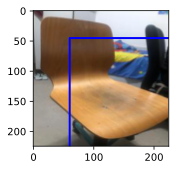

In [13]:
%matplotlib inline
import tensorflow as tf
from d2l import tensorflow as d2l

d2l.set_figsize()
img = d2l.plt.imread('C:/Users/MANDEEP SINGH SHERRY/Desktop/practise/chair4444.jpg')
d2l.plt.imshow(img);


#@save
def box_corner_to_center(boxes):
    """Convert from (upper-left, lower-right) to (center, width, height)."""
    x1, y1, x2, y2 = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3]
    cx = (x1 + x2) / 2
    cy = (y1 + y2) / 2
    w = x2 - x1
    h = y2 - y1
    boxes = tf.stack((cx, cy, w, h), axis=-1)
    return boxes

#@save
def box_center_to_corner(boxes):
    """Convert from (center, width, height) to (upper-left, lower-right)."""
    cx, cy, w, h = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3]
    x1 = cx - 0.5 * w
    y1 = cy - 0.5 * h
    x2 = cx + 0.5 * w
    y2 = cy + 0.5 * h
    boxes = tf.stack((x1, y1, x2, y2), axis=-1)
    return boxes

# Here `bbox` is the abbreviation for bounding box
dog_bbox, cat_bbox = [60.0, 45.0, 378.0, 516.0], [400.0, 112.0, 655.0, 493.0]


boxes = tf.constant((dog_bbox, cat_bbox))
box_center_to_corner(box_corner_to_center(boxes)) == boxes



#@save
def bbox_to_rect(bbox, color):
    """Convert bounding box to matplotlib format."""
    # Convert the bounding box (upper-left x, upper-left y, lower-right x,
    # lower-right y) format to the matplotlib format: ((upper-left x,
    # upper-left y), width, height)
    return d2l.plt.Rectangle(xy=(bbox[0], bbox[1]), width=bbox[2] - bbox[0],
                             height=bbox[3] - bbox[1], fill=False,
                             edgecolor=color, linewidth=2)



fig = d2l.plt.imshow(img)
fig.axes.add_patch(bbox_to_rect(dog_bbox, 'blue'))
fig.axes.add_patch(bbox_to_rect(cat_bbox, 'red'));


In [12]:
import cv2

img = cv2.imread('C:/Users/MANDEEP SINGH SHERRY/Desktop/practise/chair4444.jpg')
#print(img)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#print(gray)

ret, thresh = cv2.threshold(gray, 80, 255, cv2.THRESH_BINARY)

contours,_ = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)


x1, y1, w, h = cv2.boundingRect(contours[1])
x2, y2 = x1 + w, y1 + h
print((x1, y1), (x2, y2)) 
cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

cv2.imwrite('C:/Users/MANDEEP SINGH SHERRY/Desktop/practise/res1.jpg', img)

(119, 117) (122, 121)


True

In [17]:
!pip install opencv-contrib-python

In [24]:
# import the necessary packages
import numpy as np
import cv2

def find_marker(image):
	# convert the image to grayscale, blur it, and detect edges
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	gray = cv2.GaussianBlur(gray, (5, 5), 0)
	edged = cv2.Canny(gray, 35, 125)

	# find the contours in the edged image and keep the largest one;
	# we'll assume that this is our piece of paper in the image
	(cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
	c = max(cnts, key = cv2.contourArea)

	# compute the bounding box of the of the paper region and return it
	return cv2.minAreaRect(c)

def distance_to_camera(knownWidth, focalLength, perWidth):
	# compute and return the distance from the maker to the camera
	return (knownWidth * focalLength) / perWidth

# initialize the known distance from the camera to the object, which
# in this case is 24 inches
KNOWN_DISTANCE = 24.0

# initialize the known object width, which in this case, the piece of
# paper is 12 inches wide
KNOWN_WIDTH = 11.0

# initialize the list of images that we'll be using
IMAGE_PATHS = ["C:/Users/MANDEEP SINGH SHERRY/Desktop/practise/camera_table249.jpg"]

# load the furst image that contains an object that is KNOWN TO BE 2 feet
# from our camera, then find the paper marker in the image, and initialize
# the focal length
image = cv2.imread(IMAGE_PATHS[0])
marker = find_marker(image)
focalLength = (marker[1][0] * KNOWN_DISTANCE) / KNOWN_WIDTH

# loop over the images
for imagePath in IMAGE_PATHS:
	# load the image, find the marker in the image, then compute the
	# distance to the marker from the camera
	image = cv2.imread(imagePath)
	marker = find_marker(image)
	inches = distance_to_camera(KNOWN_WIDTH, focalLength, marker[1][0])

	# draw a bounding box around the image and display it
	box = np.int0(cv2.boxPoints(marker))
	cv2.drawContours(image, [box], -1, (0, 255, 0), 2)
	cv2.putText(image, "%.2fft" % (inches / 12),
		(image.shape[1] - 200, image.shape[0] - 20), cv2.FONT_HERSHEY_SIMPLEX,
		2.0, (0, 255, 0), 3)
	cv2.imshow("image", image)
	cv2.waitKey(0)

In [26]:
!pip install tensorflow-object-detection-api


  Created wheel for tensorflow-object-detection-api: filename=tensorflow_object_detection_api-0.1.1-py3-none-any.whl size=844518 sha256=296f8bec3013dd87b915a08250d8d47af7440a8ce94b8b03ca0ca005da1ba97f
  Stored in directory: c:\users\mandeep singh sherry\appdata\local\pip\cache\wheels\93\4e\cd\e2d0aecb1680cbc6730933bc53a776f7213acb08ecbb91c301
Successfully built tensorflow-object-detection-api
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 2.0.0
    Uninstalling importlib-metadata-2.0.0:
      Successfully uninstalled importlib-metadata-2.0.0


In [29]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import pathlib
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import display
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util
 
while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
 
def load_model(model_name):
  base_url = 'http://download.tensorflow.org/models/object_detection/'
  model_file = model_name + '.tar.gz'
  model_dir = tf.keras.utils.get_file(
    fname=model_name, 
    origin=base_url + model_file,
    untar=True)
 
  model_dir = pathlib.Path(model_dir)/"saved_model"
  model = tf.saved_model.load(str(model_dir))
  return model
 
PATH_TO_LABELS = 'C:/Users/MANDEEP SINGH SHERRY/Concat_Model/saved_model.pb'
print(PATH_TO_LABELS)
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)
 
model_name = 'ssd_inception_v2_coco_2017_11_17'
detection_model = load_model(model_name)
 
def run_inference_for_single_image(model, image):
  image = np.asarray(image)
  # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
  input_tensor = tf.convert_to_tensor(image)
  # The model expects a batch of images, so add an axis with `tf.newaxis`.
  input_tensor = input_tensor[tf.newaxis,...]
 
  # Run inference
  model_fn = model.signatures['serving_default']
  output_dict = model_fn(input_tensor)
 
  # All outputs are batches tensors.
  # Convert to numpy arrays, and take index [0] to remove the batch dimension.
  # We're only interested in the first num_detections.
  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy() 
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections
 
  # detection_classes should be ints.
  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
    
  # Handle models with masks:
  if 'detection_masks' in output_dict:
    # Reframe the the bbox mask to the image size.
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
              output_dict['detection_masks'], output_dict['detection_boxes'],
               image.shape[0], image.shape[1])      
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                       tf.uint8)
    output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()
     
  return output_dict

C:/Users/MANDEEP SINGH SHERRY/Concat_Model/saved_model.pb


AttributeError: module 'tensorflow' has no attribute 'gfile'